In [28]:
import numpy as np

- input_features $=: n$
- output_features $=: m$
- timesteps $ =: t$
- inputs $\in \mathbb{R}^{t\times n}$
- $W \in \mathbb{R}^{m\times n}$, $U \in \mathbb{R}^{m \times m}$, $b \in \mathbb{R}^{m}$.
- input_t $\in \mathbb{R}^n$.



In [29]:
timesteps = 100
input_features = 32
output_features = 64

# Random noise
inputs = np.random.random((timesteps,input_features))
# Initial state: an all zero vector

W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b= np.random.random((output_features,))

state_t = np.zeros((output_features))

successive_outputs = []
for input_t in inputs:
    # output in \R^m
    output_t = np.tanh(np.dot(W,input_t) + np.dot(U, state_t)+b)
    # successive outputs will be in \R^{t \times m}
    successive_outputs.append(output_t)

    state_t = output_t 

final_output_sequence = np.concatenate(successive_outputs,axis = 0)
# Follwoing in \R^{t \times m}
np.asarray(successive_outputs).shape

(100, 64)

In [2]:
from keras.models import Sequential 
from keras.layers import Embedding, SimpleRNN
# Returns output at the last timestep
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32)) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Returns full state sequence
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences = True) )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Can stack RNN layers
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences = True) )
model.add(SimpleRNN(32,return_sequences = True) )
model.add(SimpleRNN(32,return_sequences = True) )
model.add(SimpleRNN(32) )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB example
***

Load data:

In [9]:
from keras.datasets import imdb 
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500 
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences') 
print(len(input_test), 'test sequences') 
print('Pad sequences (samples x time)') 

# pads the vector with zeroes, so that they are all of size maxlen...
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) 
input_test = sequence.pad_sequences(input_test, maxlen=maxlen) 
print('input_train shape:', input_train.shape) 
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
(25000,)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [11]:
from keras.layers import Dense

model = Sequential([ 
    Embedding(max_features,32),
    SimpleRNN(32),
    Dense(1,activation='sigmoid')
]
)

model.compile(optimizer = 'rmsprop', 
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

history = model.fit(input_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
157/157 [==============================] - 15s 90ms/step - loss: 0.6892 - acc: 0.5281 - val_loss: 0.6240 - val_acc: 0.6698
Epoch 2/10
157/157 [==============================] - 14s 88ms/step - loss: 0.5177 - acc: 0.7683 - val_loss: 0.4674 - val_acc: 0.7828
Epoch 3/10
157/157 [==============================] - 15s 95ms/step - loss: 0.3330 - acc: 0.8638 - val_loss: 0.3773 - val_acc: 0.8430
Epoch 4/10
157/157 [==============================] - 15s 94ms/step - loss: 0.2610 - acc: 0.8959 - val_loss: 0.4043 - val_acc: 0.8316
Epoch 5/10
157/157 [==============================] - 14s 89ms/step - loss: 0.1917 - acc: 0.9264 - val_loss: 0.4307 - val_acc: 0.8236
Epoch 6/10
157/157 [==============================] - 14s 92ms/step - loss: 0.1325 - acc: 0.9552 - val_loss: 0.5056 - val_acc: 0.8290
Epoch 7/10
157/157 [==============================] - 14s 87ms/step - loss: 0.0938 - acc: 0.9694 - val_loss: 0.6999 - val_acc: 0.7406
Epoch 8/10
157/157 [==============================] - 14s 87ms

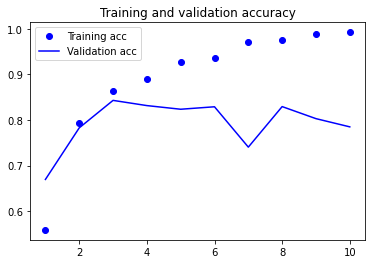

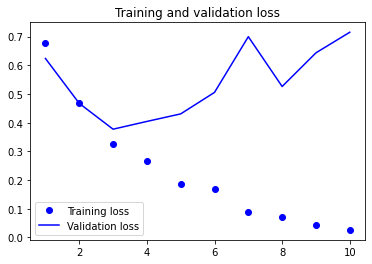

In [14]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy') 
plt.legend() 

plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

## Concrete LSTM example in Keras
***

In [16]:
from keras.layers import LSTM 

model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', 
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

history = model.fit(input_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
157/157 [==============================] - 38s 233ms/step - loss: 0.6335 - acc: 0.6442 - val_loss: 0.4117 - val_acc: 0.8354
Epoch 2/10
157/157 [==============================] - 33s 210ms/step - loss: 0.3239 - acc: 0.8688 - val_loss: 0.3018 - val_acc: 0.8756
Epoch 3/10
157/157 [==============================] - 32s 205ms/step - loss: 0.2364 - acc: 0.9110 - val_loss: 0.3143 - val_acc: 0.8718
Epoch 4/10
157/157 [==============================] - 31s 198ms/step - loss: 0.2036 - acc: 0.9276 - val_loss: 0.3558 - val_acc: 0.8468
Epoch 5/10
157/157 [==============================] - 29s 188ms/step - loss: 0.1774 - acc: 0.9362 - val_loss: 0.3060 - val_acc: 0.8692
Epoch 6/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1494 - acc: 0.9486 - val_loss: 0.3238 - val_acc: 0.8794
Epoch 7/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1382 - acc: 0.9522 - val_loss: 0.3421 - val_acc: 0.8852
Epoch 8/10
157/157 [==============================] - 3

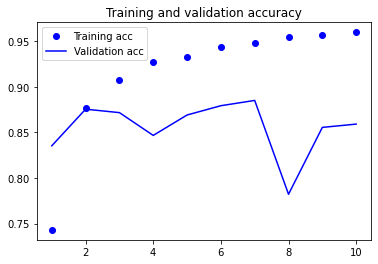

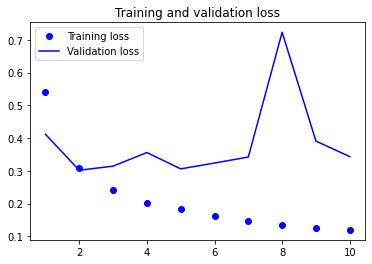

In [17]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy') 
plt.legend() 

plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()